<!-- # Task 4:  Quantum Algorithms 

## 4.1 Complexity Theory 


## 4.2 Practical Considerations: Y2Q

Current encryption standards are dominated by 2048 bit RSA encryption.  -->


Thomas Clarke  
Quantum Computing Technical Foundations  
September 22, 2022
# Assignment  4: Quantum Circuits 

Assignment Due: Friday 30th September  

You may have noticed this assignment looks different to the others. For this week you get to do quantum computing, using a real quantum processor! 

You can [register for an IBM ID here](https://quantum-computing.ibm.com/)

For each of these questions, you can simulate the circuit, generate a histogram of your results & interpret it.

I will provide the building blocks & some hints 

In [7]:
import qiskit
import numpy as np
from qiskit import QuantumCircuit,Aer, execute
from qiskit.tools.visualization import plot_histogram

## Question 1: Quantum Random Number Generator

The easiest application of quantum computers is to generate random numbers. For this, we need a quantum circuit that can generate an equal superposition of states and then measure them 

For the first part of this, we will generate the quantum circuit that generates random numbers between 0 - 15. 

First you will need to generate the superposition state $\ket{++++}$ and then measure all the qubits.

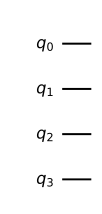

In [8]:
#### CODE ###


circ_qrng = QuantumCircuit(4) # Quantum circuit with 4 qubits 

### YOUR CODE HERE ###


### YOUR CODE ENDS ###
circ_qrng.draw()

In [ ]:
# Let's run the circuit 

sim = Aer.get_backend('aer_simulator')

job = sim.run(circ_qrng)          # run the experiment on ideal simulator
result = job.result()                      # get the results
counts = result.get_counts()               # interpret the results as a "counts" dictionary
print(counts)
plot_histogram(counts)

## Question 2 Decomposition of CNOT 

The requirements for universal quantum computing are that we need a gate that can entangle qubits and to be able to do arbitrary quantum gates. What this means is we can generate any quantum circuit from having an entangling gate and arbitrary single quantum gates ($U(\theta, \phi, \lambda )$). For example, the CNOT gate can be broken down into a CZ gate and some other gates


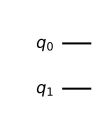

In [49]:
cnot_decomposed = QuantumCircuit(2)

### YOUR CODE HERE ###

# Hadamard on 0

# Controlled-Z (0,1)

# Hadamard on 0

### YOUR CODE ENDS ###

cnot_decomposed.draw()

In [ ]:
# Let's test that it works

test = QuantumCircuit(2)

test.h(0) 
test.compose(cnot_decomposed)
test.measure_all()


job = sim.run(test)                        # run the experiment on ideal simulator
result = job.result()                      # get the results
counts = result.get_counts()               # interpret the results as a "counts" dictionary
print(counts)
plot_histogram(counts)

## Question 3: SWAP in terms of CNOT

In the challenge question for assignment 3, we showed that it's impossible to clone a quantum state. But we can swap the quantum states of two qubits. 

This effectively does:
SWAP

To do this gate, we can decompose it into three CNOTs

$SWAP_{a,b} = CNOT_{a,b}CNOT_{b,a}CNOT_{a,b}$


1. Implement the circuit that does this (under the name `swap_qc_cnot `)
2. If we implement a Swap followed by your swap, what do you expect to get. 


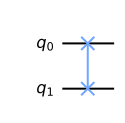

In [44]:
swap_qc = QuantumCircuit(2)

swap_qc.swap(0,1)

swap_qc.draw(output= 'mpl')

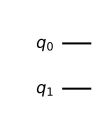

In [45]:
swap_qc_cnot = QuantumCircuit(2)

### YOUR CODE HERE ###

# first CNOT

# second CNOT

# third CNOT 


### YOUR CODE ENDS ###

swap_qc_cnot.draw(output = 'mpl')

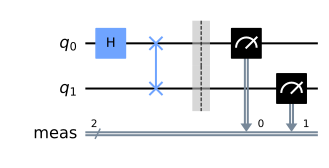

In [46]:
double_swap = QuantumCircuit(2)

double_swap.h(0)

double_swap = double_swap.compose(swap_qc)
double_swap.compose(swap_qc_cnot)


double_swap.measure_all()


double_swap.draw()

{'00': 525, '01': 499}


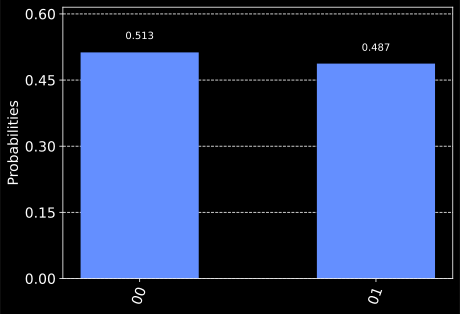

In [47]:
# Now we run the circuit to see what we get 

test = QuantumCircuit(2)
test.h(0)
test.measure_all()

# Let's run the circuit 


job = sim.run(test)                        # run the experiment on ideal simulator
result = job.result()                      # get the results
counts = result.get_counts()               # interpret the results as a "counts" dictionary
print(counts)
plot_histogram(counts)

{'10': 498, '00': 526}


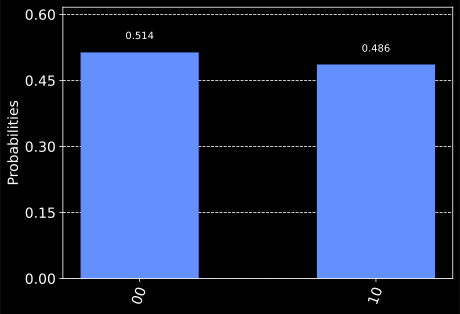

In [48]:
# If your circuit is done correctly, this cell will output identically to the one above


job = sim.run(double_swap)                        # run the experiment on ideal simulator
result = job.result()                      # get the results
counts = result.get_counts()               # interpret the results as a "counts" dictionary
print(counts)
plot_histogram(counts)

## Question 4: What could have caused it

Being able to interpret the results of a quantum circuit is a useful tool in debugging a quantum computation.


![State](Images/swirtch_v1_oslo_19.09.png)

What state $\ket{abcd}$ could have generated this histogram?

> Hint: Remember what $\ket{+}$ looks like

## Question 5 The Quantum Fourier Transform 

The quantum Fourier transform (QFT) is the most powerful subroutine for any quantum algorithm. It is what grants Shors algorithm its exponential speedup and is featured in many quantum algorithms. This exercise will not fully explain what it is, or how it works, but will instead simply generate the circuit for the QFT. This should be a lot easier than the last challenge question in Assignment 3.

This version was proposed by [Ekert & Joza in 1998](https://arxiv.org/abs/quant-ph/9803072).

This circuit looks like this 
![qft](Images/qft.png)



Starting from the top, we put a Hadamard on the top qubit, followed by a series of controlled rotation gates up to $R_n$. Each of these controlled rotation gates has all the qubits below as controls for rotations. So if $\ket{x_{n-1}} = \ket{1}$ it would perform $R_2$ on qubit 0. Each rotation gate has this form: 

$$
R_m = R_z(\theta_m) = \begin{bmatrix} 1 & 0 \\ 0 & e^{i2\pi/M} \end{bmatrix}
$$

Where the corresponding rotation angle is $\theta_m = 2\pi/M$ 
For instance, the QFT of two qubits has this form: 

You can check out [a nice demo on Wolfram](https://demonstrations.wolfram.com/QuantumFourierTransformCircuit/)

Your task is to generate the circuit for the QFT for a two qubits

### Bonus conceptual questions
- What do you expect the final state from  $ QFT\ket{0}$?
- What does the Quantum Fourier Transform of 1 qubit look like?

In [ ]:
F2 = QuantumCircuit(2)

### YOUR CODE HERE ###

#put Hadamard on qubit 0 

# Do controlled z with qubit 1 as control, qubit 0 as target

# Put a Hadamard on qubit 1

### YOUR CODE ENDS ###

F2.measure_all()

F2.draw()

In [ ]:
# What do you expect to get as output

job = sim.run(F2)          # run the experiment on ideal simulator
result = job.result()                      # get the results
counts = result.get_counts()               # interpret the results as a "counts" dictionary
print(counts)
plot_histogram(counts)

## Challenge Question 1: Reveal the period

In assignment 3, the QFT was shown to reveal the periodicity within a quantum state. Here we will show how this works. We had this state

$$
\ket{\psi} = \begin{bmatrix} 1 \\ -1 \\ 1 \\ -1 \end{bmatrix}
$$

1. Write this state as a product state 

> Hint: write out the tensor product as 
>
> $$
 \ket{\psi} = \ket{\psi_0} \otimes \ket{\psi_1} = \begin{bmatrix} a_0 b_0 \\ a_0 b_1 \\ a_1b_0 \\ a_1 b_1 \end{bmatrix}
> $$
> And solve for $\ket{\psi_0} \ket{\psi_1}$


2. Design a circuit to generate this product state using only single qubit gates.

In [ ]:
state_prep_circ = QuantumCircuit(2)

### YOUR CODE HERE ###

### YOUR CODE ENDS ###


state_prep_circ.draw()

In [ ]:
period_circ = state_prep_circ + F2

period_circ.swap(0,1) # we also need to swap the order of the qubits

period_circ.measure_all()

job = sim.run(period_circ)          # run the experiment on ideal simulator
result = job.result()                      # get the results
counts = result.get_counts()               # interpret the results as a "counts" dictionary
print(counts)
plot_histogram(counts)

## Challenge Question2 : Efficient entanglement generation 

There are quantum algorithms where we need to entangle a lot of qubits together. The choice of how you do this can make a huge difference in how well the circuit performs. 

This question has been adapted from IBM's Qiksit Global Summer School 2022. 

Depth of circuit is 16


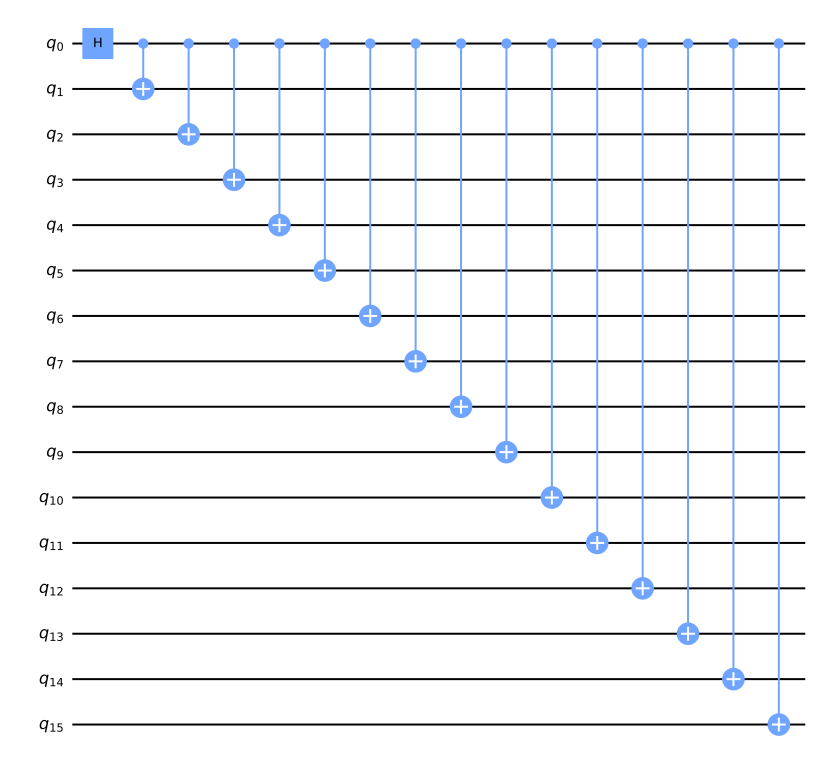

In [ ]:
qc = QuantumCircuit(16)

#Step 1: Preparing the first qubit in superposition
qc.h(0)

#Step 2: Entangling all other qubits with it (1 is included 16 is excluded)
# for x in range(1, 16):
#   qc.cx(0,x)

[qc.cx(0,x) for x in range(1, 16)]

print(f"Depth of circuit is {qc.depth()}")

qc.draw()

This circuit  has a depth equal to the number of entangling operations +1, in this case, that is 16. So by the time we entangle q_0 with q_15, there has been considerable decoherence in the entanglement between q_0 & q_1. Thankfully, we can do a lot better. Instead we can entangle our qubits in parallel. 

Your mission, should you choose to accept it, is to creat a circit that does the same as the one above, but runs in a depth of 4 (+1 for the hadamard at the start)

In [ ]:
efficent_ent = QuantumCircuit(16) #Same as above

#Step 1: Preparing the first qubit in superposition
qc.h(0)


### YOUR CODE HERE ###

#### END 


print(f"Depth of circuit is {efficent_ent.depth()}")
efficent_ent.draw()

In [ ]:
# Run this if you want to share information about your system

import qiskit.tools.jupyter
%qiskit_version_table